<a href="https://colab.research.google.com/github/eva-butler/CS4774/blob/main/CS_4774_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


In [44]:
#Lets begin with basic imports that the textbook uses. Also a way to ensure consistant results across runs
import sys
import numpy as np
import os
import pandas as pd
np.random.seed(42)

#textbooks way of plotting pretty images:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

STEP 1

In [45]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Your code goes here for this section.

STEP 2

In [46]:
housing = pd.read_csv("housing.csv")

housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [49]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


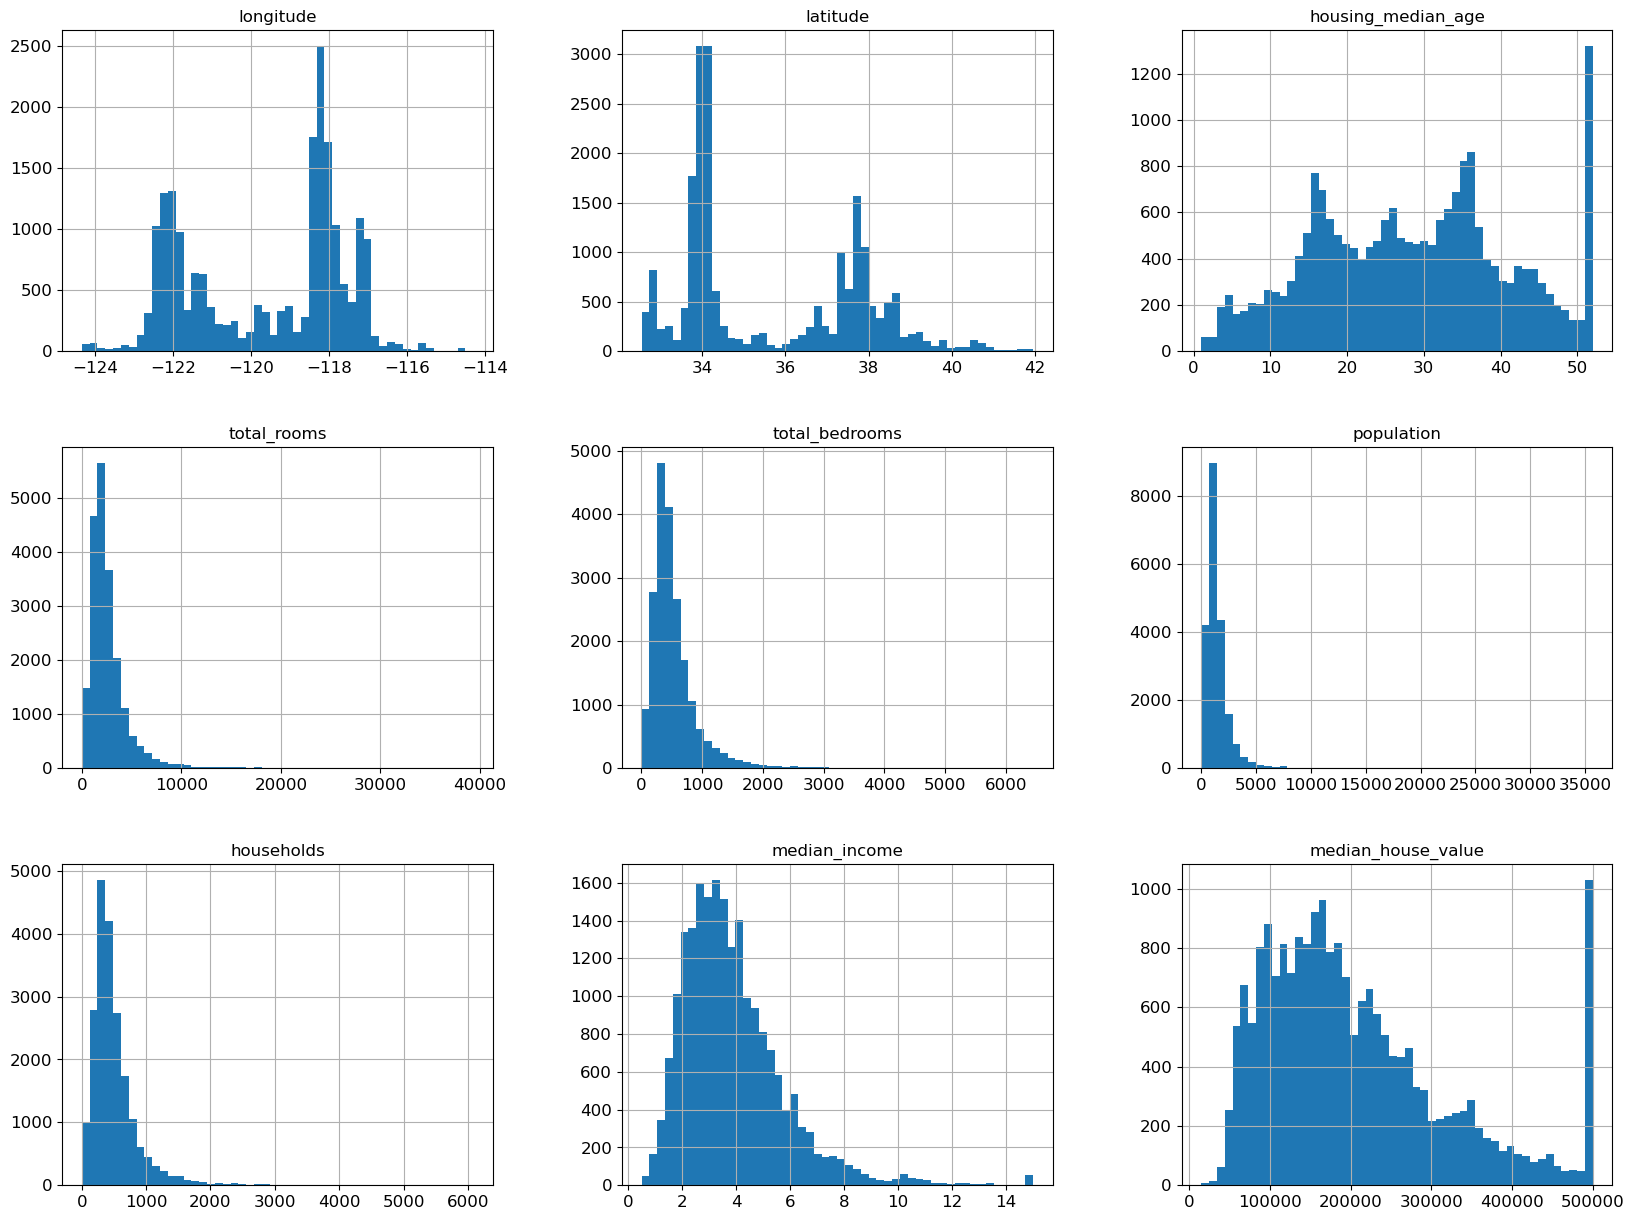

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [51]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [52]:
print( train_set.shape )
print( test_set.shape )

(16512, 10)
(4128, 10)


In [53]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [54]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [55]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

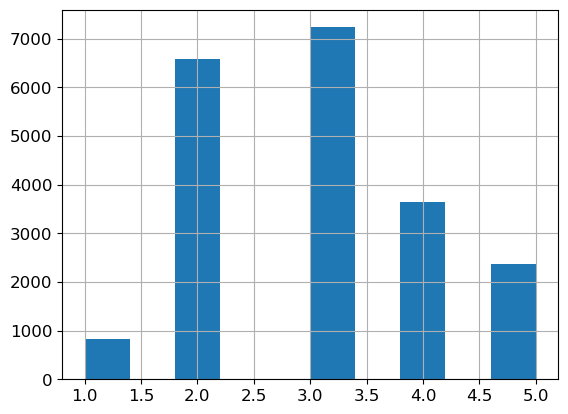

In [56]:
housing["income_cat"].hist()

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [58]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [59]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

STEP 3

In [60]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

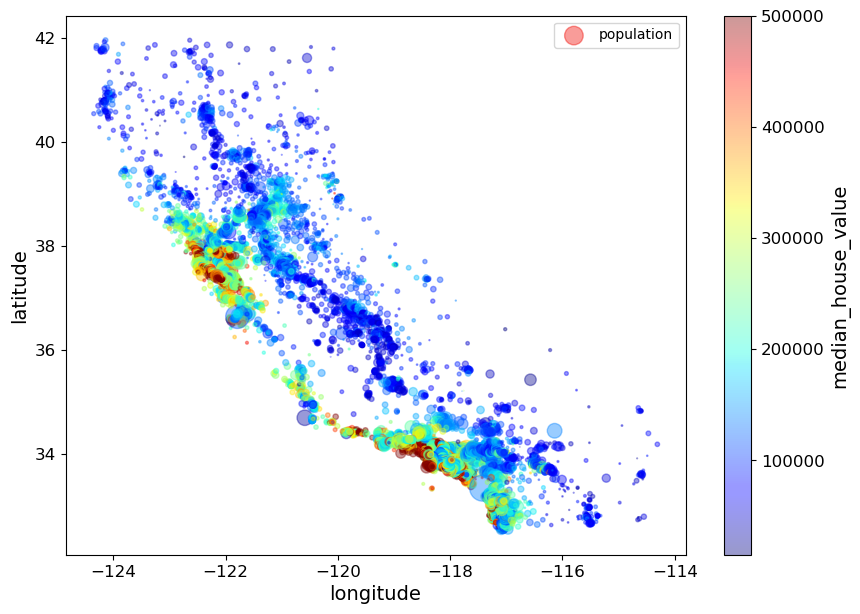

In [61]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [62]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [63]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix.shape)
corr_matrix["median_house_value"].sort_values(ascending=False)

(9, 9)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

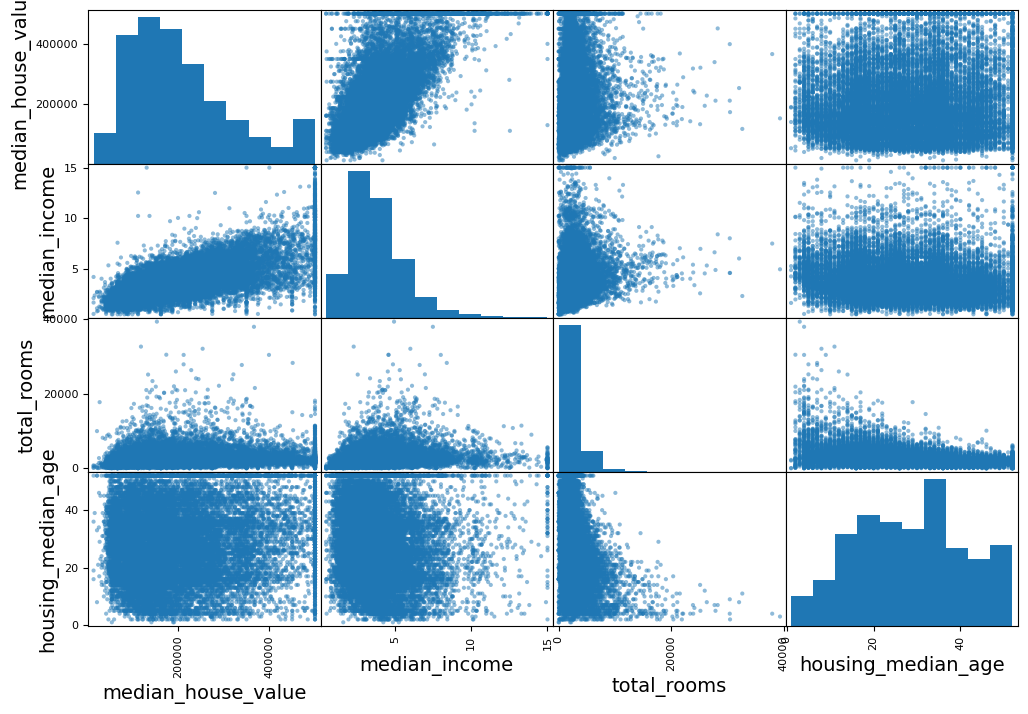

In [64]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

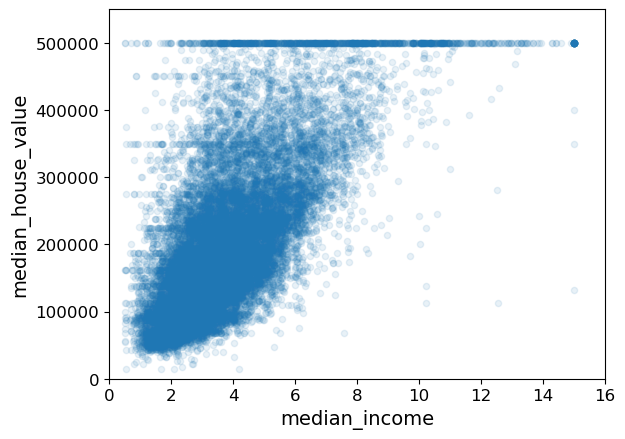

In [65]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [66]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


housing["log_total_rooms"] = np.log1p(housing["total_rooms"])

housing.shape

(20640, 15)

In [67]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
log_total_rooms             0.159422
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [68]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,log_total_rooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655,7.629377
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050,0.749991
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308,1.098612
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741,7.278456
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116,7.662938
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261,8.054840
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333,10.579514


STEP 4) DATA CLEANING

In [69]:
#since we are doing k-means we dont need to split the data set. kmeans is a unsupervised clustering method
#housing = strat_train_set.drop("median_house_value", axis=1) 
#housing_labels = strat_train_set["median_house_value"].copy()

In [70]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,log_total_rooms
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679,7.136483
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255,6.900731
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727,8.547722
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137,6.793466
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727,6.616065


In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
print(X)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

[[-122.23         37.88         41.         ...    0.14659091
     2.55555556    6.78105763]
 [-122.22         37.86         21.         ...    0.15579659
     2.10984183    8.86785006]
 [-122.24         37.85         52.         ...    0.12951602
     2.80225989    7.29165621]
 ...
 [-121.22         39.43         17.         ...    0.21517303
     2.3256351     7.72090525]
 [-121.32         39.43         18.         ...    0.21989247
     2.12320917    7.52886926]
 [-121.24         39.37         16.         ...    0.22118492
     2.61698113    7.93236215]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,log_total_rooms
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,3.0,5.761468,0.203162,2.614679,7.136483
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,2.0,3.830116,0.203162,2.826255,6.900731
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,2.0,4.048704,0.203162,2.938727,8.547722
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,4.0,6.102740,0.203162,2.630137,6.793466
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,3.0,4.633540,0.203162,2.403727,6.616065


In [72]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [73]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/root/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# When set to false, that feature will not be added --> so here it adds two features only
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)



num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
print(housing.shape)
print(housing_prepared.shape)

(20640, 15)
(20640, 22)


Now everything is ready to go to implement k-means!

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

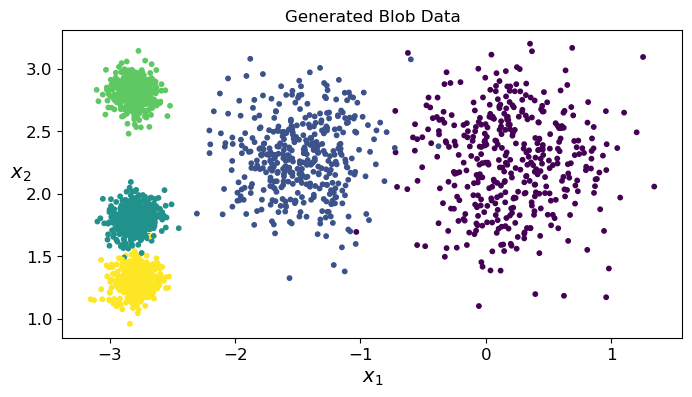

In [77]:
#just going to start by visualizing the data to get an idea of what I am working with. Basically what we did in the Colab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="viridis") 
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X, y) 
plt.title("Generated Blob Data")
plt.show()

In [78]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

def sse(X, clusters, centroids):
    sse = 0
    for i, point in enumerate(X):
        centroid = centroids[int(clusters[i])]
        sse += np.sum((point - centroid) ** 2)
    return sse

def initialize_centroids(X, k):
    #pick out k random vectors
    random_starting_centroids = np.random.choice(X.shape[0], k, replace=False)
    return X[random_starting_centroids, :]

def distance(x, y, p=2):
    #sup distance
    if p == np.inf:
        return np.max(np.abs(x - y))  
    else:
        #the formula for minikovski from class
        return np.sum(np.abs(x - y) ** p) ** (1 / p)
    

def assign_clusters(X, centroids, distance_measure):
    #make an empty array to store cluster index for each vector
    clusters = np.zeros(X.shape[0])
    p = distance_measure
    for i, point in enumerate(X):
        distances = np.array([distance(point, centroid, p) for centroid in centroids])
        clusters[i] = np.argmin(distances) #take the min of distances to all the centroids and that is the closest centroid for that specific vector
    
    return clusters 
    

def recalculate(X, clusters, k):
    
    new_centroids = np.zeros((k, X.shape[1]))
    
    for cluster_idx in range(k):
        points_in_cluster = X[clusters == cluster_idx]
        if len(points_in_cluster) > 0:
            new_centroids[cluster_idx] = np.mean(points_in_cluster, axis=0)
        else:
            new_centroids[cluster_idx] = X[np.random.randint(0, X.shape[0])]
    
    return new_centroids


def k_means(X, k, distance_measure=2):
    p =distance_measure
    #1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
    centroids = initialize_centroids(X, k)
    #to track the cluster assignments
    clusters = assign_clusters(X, centroids, p)
    previous_centroids = None
    #4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.
    while not np.array_equal(centroids, previous_centroids):
        previous_centroids = centroids.copy()  
        #2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
        centroids = recalculate(X, clusters, k)
        current_sse = sse(housing_prepared, clusters,centroids)
        #print("current sse: ", current_sse)
        #3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
        clusters = assign_clusters(X, centroids, p)
    return centroids, clusters

        

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.



k=2 SSE: 309080.31514984154


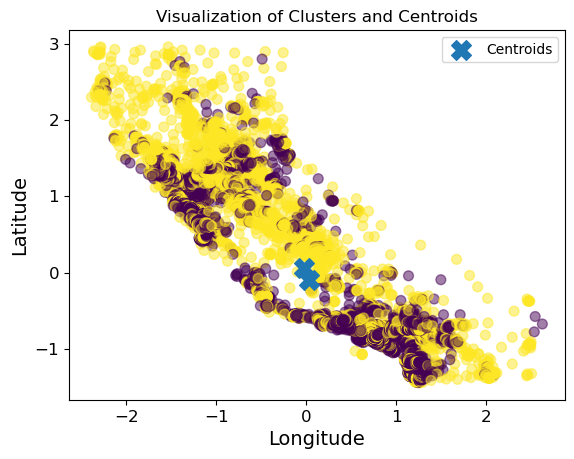

k=3 SSE: 269169.22898067156


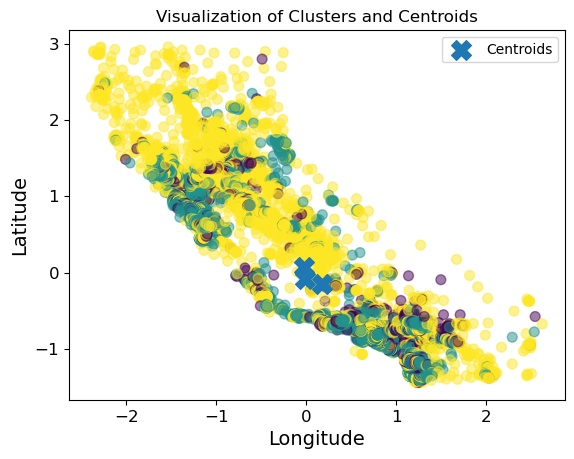

k=4 SSE: 243008.58320623884


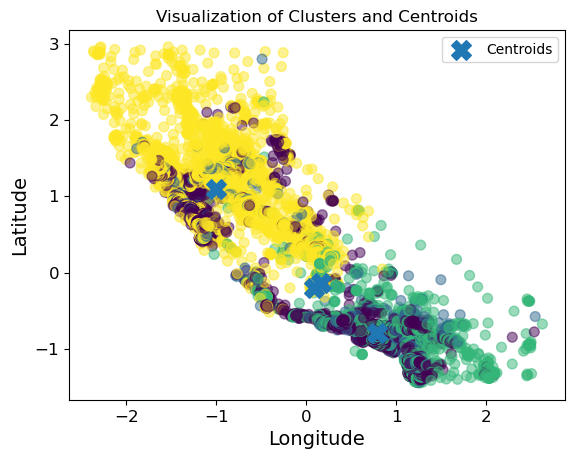

k=5 SSE: 228867.02507000123


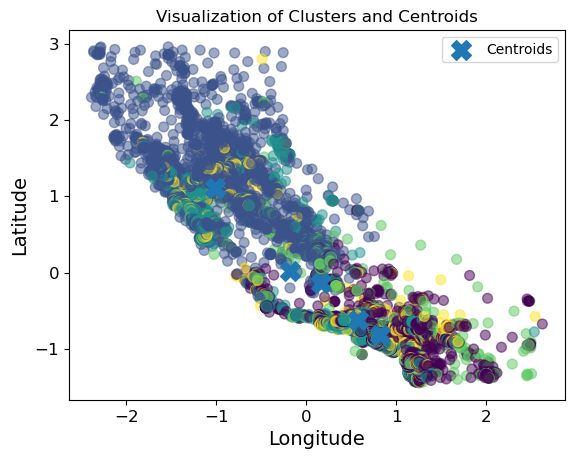

k=6 SSE: 216383.50252502045


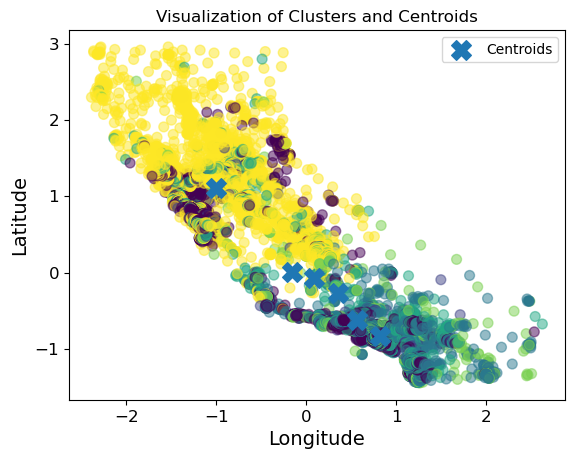

k=7 SSE: 208631.24964930635


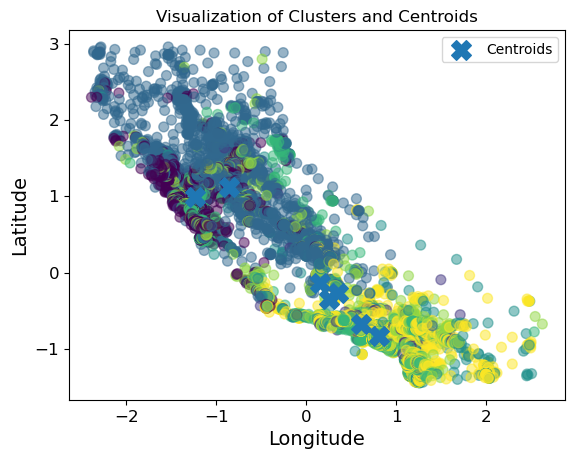

k=8 SSE: 192395.60976869825


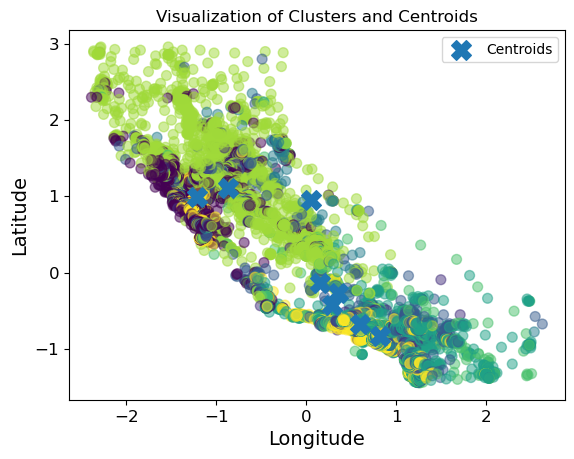

k=9 SSE: 195566.84075616163


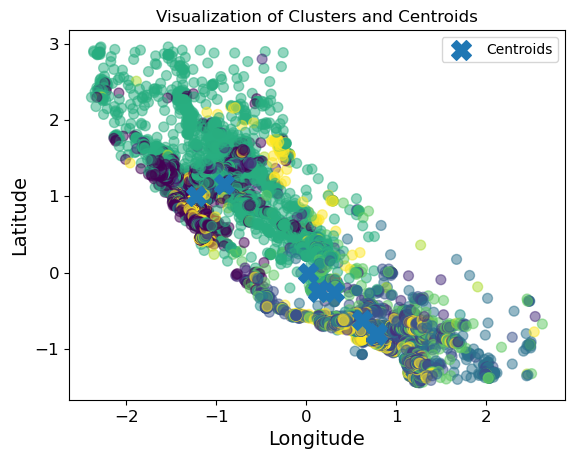

k=10 SSE: 191443.40054428965


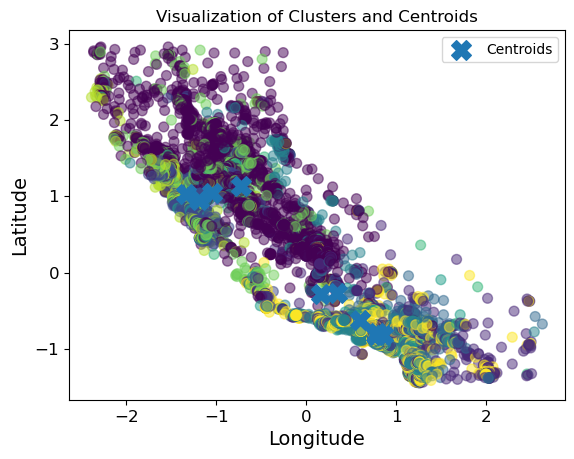

,k,sse,avg_cluster_means,avg_cluster_stds
0,2,309080.315150,"[0.2309917007026809, -0.06362953982059553]","[0.8078066889946398, 0.6855445555378168]"
1,3,269169.228981,"[0.4715731573383243, 0.11995478156966052, -0.0...","[0.7691241540920978, 0.6564056441318482, 0.671..."
2,4,243008.583206,"[0.15003667812989907, 0.5293098164326401, -0.0...","[0.6677099120571466, 0.7759712698107829, 0.655..."
3,5,228867.025070,"[0.004746393835685053, -0.06596386851449935, 0...","[0.42773378021361946, 0.4842375889937745, 0.72..."
4,6,216383.502525,"[0.20959423612340514, 0.9885228753175533, -0.0...","[0.7207396743785056, 0.8633831690773355, 0.406..."
5,7,208631.249649,"[0.05612507291362623, 0.9979509430200161, -0.1...","[0.4785743322570733, 0.8677647129018999, 0.629..."
6,8,192395.609769,"[0.05420058725168599, 0.9979509430200161, 0.28...","[0.4893963637847507, 0.8677647129018999, 0.561..."
7,9,195566.840756,"[0.06530684879164249, 0.4304028126688529, 0.01...","[0.47882456542925084, 0.5955500050758771, 0.37..."
8,10,191443.400544,"[-0.1548887884638232, -0.08270768271701455, 0....","[0.41217883668906824, 0.6093487841536253, 0.48..."


In [82]:
# Your code goes here

import matplotlib.pyplot as plt



#sse function as described lecture 7 slide 34
def sse(X, clusters, centroids):
    sse = 0
    for i, point in enumerate(X):
        centroid = centroids[int(clusters[i])]
        sse += np.sum((point - centroid) ** 2)
    return sse

def cluster_stats(X, clusters, centroids):
    cluster_means = []
    cluster_stds = []
    for i in range(len(centroids)):
        points_in_cluster = X[clusters == i]
        cluster_means.append(np.mean(points_in_cluster, axis=0))
        cluster_stds.append(np.std(points_in_cluster, axis=0))
    return np.array(cluster_means), np.array(cluster_stds)

def plot_geographical_clusters(X, clusters, centroids, latitude_idx=1, longitude_idx=0):
    
    longitude = X[:, longitude_idx]
    latitude = X[:, latitude_idx]

    plt.scatter(longitude, latitude, c=clusters, s=50, alpha=0.5)

    plt.scatter(centroids[:, longitude_idx], centroids[:, latitude_idx], s=200, marker='X', label='Centroids')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Visualization of Clusters and Centroids')
    plt.legend()
    plt.show()

k_results = []

for k in range(2, 11):
    centroids, clusters = k_means(housing_prepared, k=k, distance_measure=2)
    sse_value = sse(housing_prepared, clusters, centroids)
    cluster_means, cluster_stds = cluster_stats(housing_prepared, clusters, centroids)
    avg_cluster_means = np.mean(cluster_means, axis=1) 
    avg_cluster_stds = np.mean(cluster_stds, axis=1)   
    result = {
        'k': k,
        'sse': sse_value,
        'avg_cluster_means': avg_cluster_means,
        'avg_cluster_stds': avg_cluster_stds
    }
    k_results.append(result)
    print(f"k={k} SSE: {sse_value}")
    plot_geographical_clusters(housing_prepared, clusters, centroids)

#this just to turn the data into a dataframe
df_results = pd.DataFrame({
    'k': [res['k'] for res in k_results],
    'sse': [res['sse'] for res in k_results],
    'avg_cluster_means': [res['avg_cluster_means'] for res in k_results],
    'avg_cluster_stds': [res['avg_cluster_stds'] for res in k_results]
})
df_results

In [83]:
df_results.head(11)


,k,sse,avg_cluster_means,avg_cluster_stds
0,2,309080.315150,"[0.2309917007026809, -0.06362953982059553]","[0.8078066889946398, 0.6855445555378168]"
1,3,269169.228981,"[0.4715731573383243, 0.11995478156966052, -0.0...","[0.7691241540920978, 0.6564056441318482, 0.671..."
2,4,243008.583206,"[0.15003667812989907, 0.5293098164326401, -0.0...","[0.6677099120571466, 0.7759712698107829, 0.655..."
3,5,228867.025070,"[0.004746393835685053, -0.06596386851449935, 0...","[0.42773378021361946, 0.4842375889937745, 0.72..."
4,6,216383.502525,"[0.20959423612340514, 0.9885228753175533, -0.0...","[0.7207396743785056, 0.8633831690773355, 0.406..."
5,7,208631.249649,"[0.05612507291362623, 0.9979509430200161, -0.1...","[0.4785743322570733, 0.8677647129018999, 0.629..."
6,8,192395.609769,"[0.05420058725168599, 0.9979509430200161, 0.28...","[0.4893963637847507, 0.8677647129018999, 0.561..."
7,9,195566.840756,"[0.06530684879164249, 0.4304028126688529, 0.01...","[0.47882456542925084, 0.5955500050758771, 0.37..."
8,10,191443.400544,"[-0.1548887884638232, -0.08270768271701455, 0....","[0.41217883668906824, 0.6093487841536253, 0.48..."


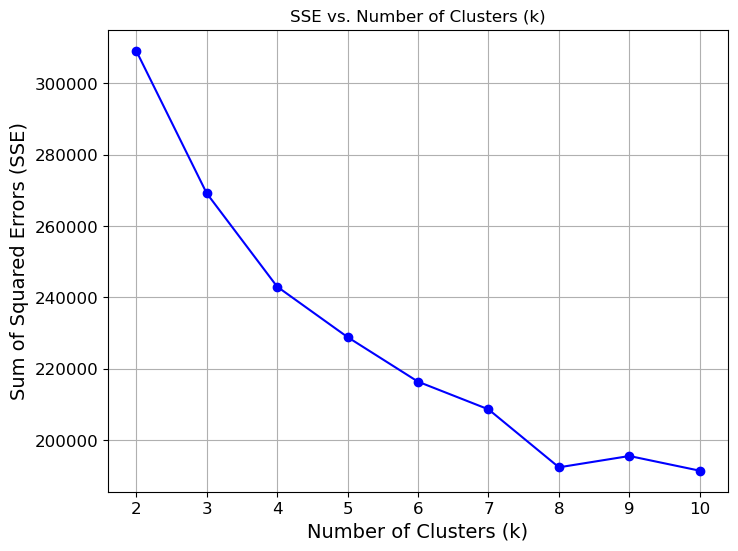

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(df_results['k'], df_results['sse'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters (k)')
plt.grid(True)
plt.show()

WRITTEN PARAGRAPH RESPONSE:


* **Cluster the data:**  Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? 

At least for my k-means clustering algorithm, the cluster centroids ended up being pretty close. There is a lot of overlap in the clusters. However, there seems to be a concentration of one cluster near silicon valley and the south western border of california. This cluster is more dense. The other cluster seems to fill in the more central and remaining areas of California. It is more dispersed. The mean values are super close and then the standard deviation values are super high. 
   
How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

As I said before, there seems to be a concentration of values near the more populated areas of California that have generally higher housing costs and median pays. The denser cluster includes Sillicon Valley, Los Angeles,  San Diego, ect. I then looked up a population density graph of California and it was VERY similar to the graph created when k=2. I did not see a clear split between northern and southern california. 

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? 

One pattern that emerges as you change k is the SSE decreases. This is expected because of the elbow plots. Another trend is a decreasing average standard deviation. This is also expected because as the number of clusters increases the distance from the items in the cluster and the centroid should gradually decrease to 0. Because when k=number of data points you would have a standard deviation and mean distance of 0. So both should be decreasing. As K changes, the areas become more defined in the images. 


Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

You can definitely start to see the different areas represented by the clusters as k increases. 

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.


Based off of the plot, the k value that seems to perform the best is 8. There is a sharp drop and then a plateau after that. In that image, it is also super clear where the different sections of California are plotted out. 



- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.

By using a k-means clustering algorithm, I was able to see how the different features such as location, median housing prices, rooms per household, ect. affected the different clusters. Population of the different areas is a foundational aspect of the housing crisis in California. After looking at the k-means graph when set to two clusters, there was a clear seperation between highly populated areas and minimally populated areas. You can see the South-Western border of California, which is highly populated, makes up most of the dense cluster. The other cluster seems to make up most of the rural, unpopulated areas. After looking at a density map of California, it is clear there is a great similarity between the k=2 clustering and population density. There is a lot to learn just from the first iteration of the k-means graph with just two cluster groups. However, as you increase the number of cluster groups, you can learn more as well. As you increase the number of clusters up to 8, you start to see how the clusters tend to be around the cities that have the best jobs. For example, you can see a cluster focused around Silicon Valley and San Diego. The cluster is very dense and clearly represents a higher housing prices based on the unequal economic opprotunities. You can draw from the graph that it would be rather impossible to comfortably live in the areas like Silicon Valley unless you were making boat loads of money. Therefore, people who have middle level wages could not afford to live in the nicer areas of California. As you increase the number of clusters after 8, there is an increase in SSE, so there is no point in looking further. It is more important to analyze the graphs that appear at and before the elbow. 

If there was one way I would suggest improving this problem would be to have the companies that are successful move inland towards central California. They could slowly spread the population from the coast inland and there fore spread out the mean housing prices. This is obviously theoretical, but it would allow for newer and more complex societies to grow in less dense areas. I think this could possibly help the housing crisis in California. 


- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!